####라이브러리 호출

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('font', family='NanumBarunGothic')
import warnings
warnings.filterwarnings('ignore')

In [3]:
dlvr_call=pd.read_csv('/content/drive/MyDrive/2021_빅데이터_통신플랫폼/KT_빅데이터플랫폼_데이터셋/dlvr_call.csv')

In [4]:
dlvr_call['DLVR_CARALC_TIME']=dlvr_call['DLVR_CARALC_TIME'].replace('\\N',np.nan)
dlvr_call['DLVR_RECPT_TIME'] =dlvr_call['DLVR_RECPT_TIME'].replace('\\N',np.nan)
dlvr_call['DLVR_COMPT_TIME'] =dlvr_call['DLVR_COMPT_TIME'].replace('\\N',np.nan)

In [5]:
dlvr_call['PROCESS_DT'] = pd.to_datetime(dlvr_call['PROCESS_DT'])
dlvr_call['DLVR_RCEPT_TIME'] = pd.to_datetime(dlvr_call['DLVR_RCEPT_TIME'])
dlvr_call['DLVR_CARALC_TIME'] = pd.to_datetime(dlvr_call['DLVR_CARALC_TIME'])
dlvr_call['DLVR_RECPT_TIME'] = pd.to_datetime(dlvr_call['DLVR_RECPT_TIME'])
dlvr_call['DLVR_COMPT_TIME'] = pd.to_datetime(dlvr_call['DLVR_COMPT_TIME'])

In [6]:
dlvr_call.head()

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,3486929,2019-12-01,C000101,1,C000101,S0021950,족발/보쌈,1156013200,서울특별시,영등포구,신길동,\N,1156066000,115603000023,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157098,D0006140,3300,200,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N
1,3486930,2019-12-01,C000099,1,C000099,S0039210,치킨,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412854379205,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412853193037,D0005898,2900,0,21900,1,승인:현대카드사,2019-12-01 21:58:07,2019-12-01 22:01:06,2019-12-01 22:20:53,2019-12-01 22:26:01,\N
2,3486932,2019-12-01,C000029,1,C000043,S0036135,치킨,4115010100,경기도,의정부시,의정부동,\N,4115051000,411504343421,4115011100,경기도,의정부시,녹양동,\N,4115062000,411504343083,D0000864,3500,200,19500,2,NaN,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N
3,3486933,2019-12-01,C000105,1,C000105,S0039956,돈까스/일식,4128510400,경기도,고양시 일산동구,장항동,\N,4128559000,412854379097,4128510500,경기도,고양시 일산동구,마두동,\N,4128556000,412854379158,D0001526,3500,0,18000,2,NaN,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57,\N
4,3486934,2019-12-01,C000028,1,C000043,S0003074,치킨,4115010900,경기도,의정부시,금오동,\N,4115058000,411504343342,4115010900,경기도,의정부시,금오동,\N,4115058000,411503181019,D0000986,3500,200,18000,3,NaN,2019-12-01 19:44:37,2019-12-01 19:48:07,2019-12-01 19:54:30,2019-12-01 20:00:22,\N


In [7]:
dlvr_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296271 entries, 0 to 4296270
Data columns (total 32 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   SN                         int64         
 1   PROCESS_DT                 datetime64[ns]
 2   DLVR_REQUST_ENTRPS_ID      object        
 3   DLVR_REQUST_STTUS_VALUE    int64         
 4   DLVR_RCEPT_ENTRPS_ID       object        
 5   DLVR_STORE_ID              object        
 6   DLVR_STORE_INDUTY_NM       object        
 7   DLVR_STORE_LEGALDONG_CODE  int64         
 8   DLVR_STORE_BRTC_NM         object        
 9   DLVR_STORE_SIGNGU_NM       object        
 10  DLVR_STORE_LEGALDONG_NM    object        
 11  DLVR_STORE_LI_NM           object        
 12  DLVR_STORE_ADSTRD_CODE     int64         
 13  DLVR_STORE_RDNMADR_CODE    object        
 14  DLVR_DSTN_LEGALDONG_CODE   int64         
 15  DLVR_DSTN_BRTC_NM          object        
 16  DLVR_DSTN_SIGNGU_NM        object   

#### 지역별 배달관련 정보

* 지역별 배달 건수

In [8]:
dlvr_call['DLVR_DSTN_BRTC_NM'].value_counts()

경기도        3270332
서울특별시      1018134
인천광역시         7366
충청북도           233
경상남도           104
경상북도            36
전라북도            23
강원도              9
전라남도             8
대구광역시            6
충청남도             6
부산광역시            5
울산광역시            4
대전광역시            2
세종특별자치시          1
광주광역시            1
제주특별자치도          1
Name: DLVR_DSTN_BRTC_NM, dtype: int64

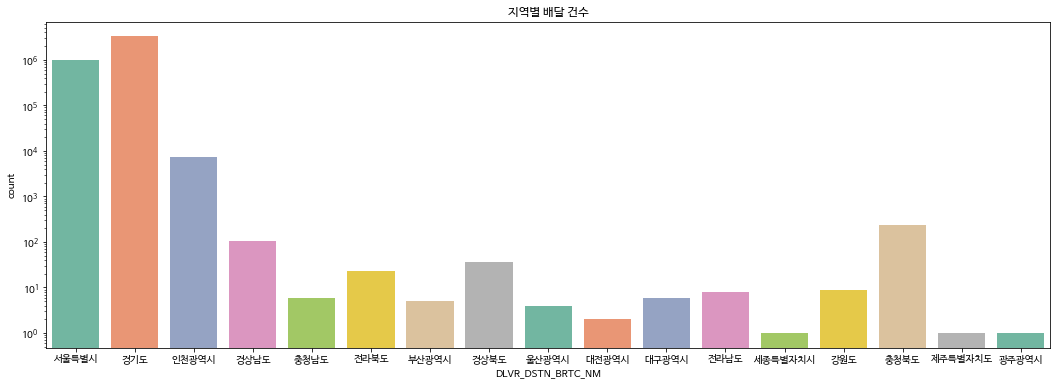

In [9]:
palette=sns.color_palette("Set2")
plt.figure(figsize=(18,6))
sns.countplot(x='DLVR_DSTN_BRTC_NM',data=dlvr_call,palette=palette)
plt.title('지역별 배달 건수')
plt.yscale('log')
plt.show()

* 한 주문당 평균 금액

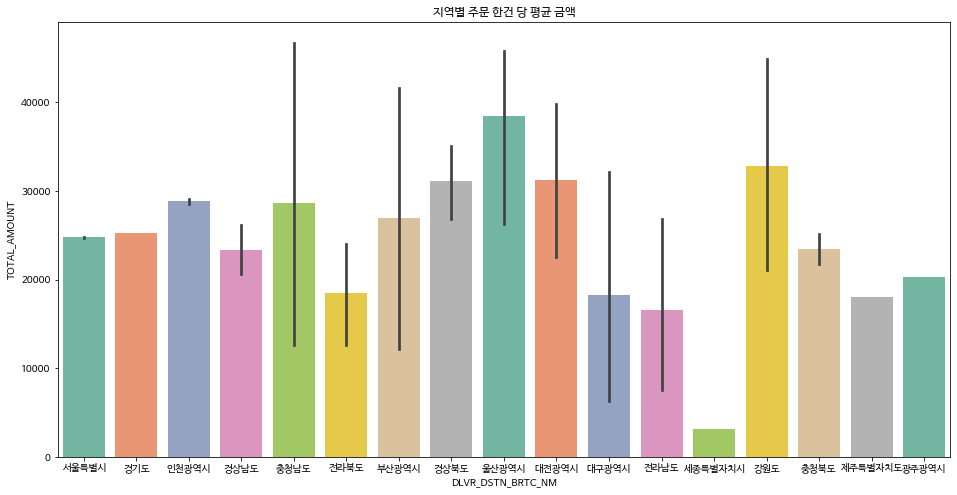

In [10]:
dlvr_call['TOTAL_AMOUNT']=dlvr_call['DLVR_AMOUNT']+dlvr_call['CALL_RLAY_FEE_AMOUNT']+dlvr_call['GOODS_AMOUNT']
plt.figure(figsize=(16,8))
sns.barplot(x='DLVR_DSTN_BRTC_NM',y='TOTAL_AMOUNT',data=dlvr_call,palette=palette)
plt.title('지역별 주문 한건 당 평균 금액')
plt.show()

#### 서울 특별시 배달 정보

* 구별 배달 건수

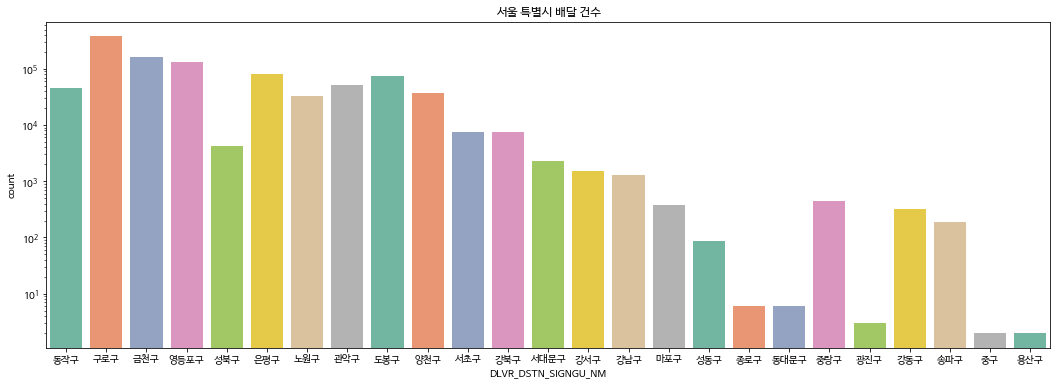

In [11]:
plt.figure(figsize=(18,6))
cond=(dlvr_call['DLVR_DSTN_BRTC_NM']=='서울특별시')
sns.countplot(x='DLVR_DSTN_SIGNGU_NM',data=dlvr_call[cond],palette=palette)
plt.title('서울 특별시 배달 건수')
plt.yscale('log')
plt.show()

* 구별 배달 평균 배달 시간

In [12]:
dlvr_call['DLVR_TOTAL_TIME']=(dlvr_call['DLVR_COMPT_TIME']-dlvr_call['DLVR_RCEPT_TIME']).apply(lambda x:x.total_seconds())
dlvr_call.head()

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,TOTAL_AMOUNT,DLVR_TOTAL_TIME
0,3486929,2019-12-01,C000101,1,C000101,S0021950,족발/보쌈,1156013200,서울특별시,영등포구,신길동,\N,1156066000,115603000023,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157098,D0006140,3300,200,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N,21500,743.0
1,3486930,2019-12-01,C000099,1,C000099,S0039210,치킨,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412854379205,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412853193037,D0005898,2900,0,21900,1,승인:현대카드사,2019-12-01 21:58:07,2019-12-01 22:01:06,2019-12-01 22:20:53,2019-12-01 22:26:01,\N,24800,1674.0
2,3486932,2019-12-01,C000029,1,C000043,S0036135,치킨,4115010100,경기도,의정부시,의정부동,\N,4115051000,411504343421,4115011100,경기도,의정부시,녹양동,\N,4115062000,411504343083,D0000864,3500,200,19500,2,NaN,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N,23200,2281.0
3,3486933,2019-12-01,C000105,1,C000105,S0039956,돈까스/일식,4128510400,경기도,고양시 일산동구,장항동,\N,4128559000,412854379097,4128510500,경기도,고양시 일산동구,마두동,\N,4128556000,412854379158,D0001526,3500,0,18000,2,NaN,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57,\N,21500,2238.0
4,3486934,2019-12-01,C000028,1,C000043,S0003074,치킨,4115010900,경기도,의정부시,금오동,\N,4115058000,411504343342,4115010900,경기도,의정부시,금오동,\N,4115058000,411503181019,D0000986,3500,200,18000,3,NaN,2019-12-01 19:44:37,2019-12-01 19:48:07,2019-12-01 19:54:30,2019-12-01 20:00:22,\N,21700,945.0


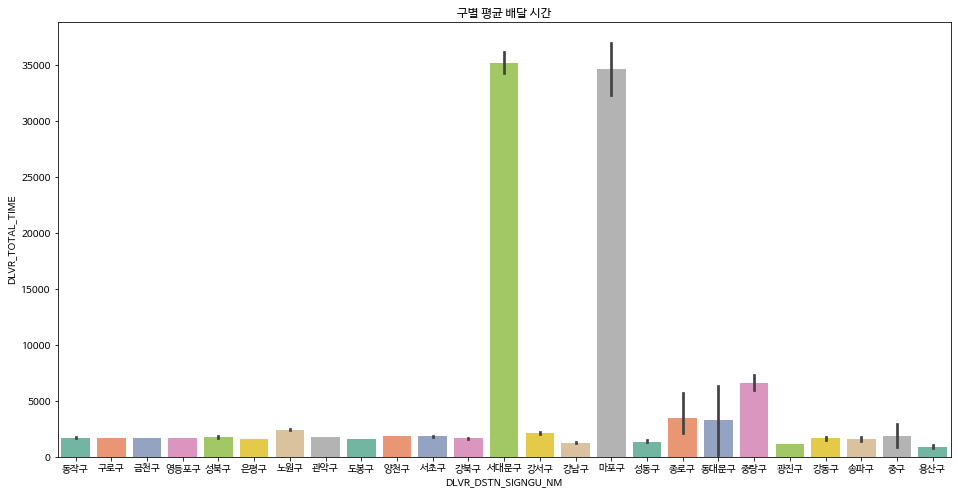

In [13]:
plt.figure(figsize=(16,8))
sns.barplot(x='DLVR_DSTN_SIGNGU_NM',y='DLVR_TOTAL_TIME',data=dlvr_call[cond],palette=palette)
plt.title('구별 평균 배달 시간')
plt.show()

* 서대문구 & 마포구의 배달 시간이 이상함